In [1]:
import pandas as pd

In [2]:
#!pip install seaborn
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("D:\\Remaining_stuff\\Datasets\\New folder\\telecom_customer_churn.csv")
pop=pd.read_csv("D:\\Remaining_stuff\\Datasets\\New folder\\telecom_zipcode_population.csv")




In [5]:
df = pd.merge(df, pop, on='Zip Code')

In [6]:
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason,Population
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,65.60,593.3,0.00,0,381.51,974.81,Stayed,NaN,NaN,4498
1,5183-SNMJQ,Male,32,No,0,Frazier Park,93225,34.827662,-118.999073,0,...,95.10,865.1,43.25,0,456.90,1278.75,Stayed,NaN,NaN,4498
2,6847-KJLTS,Female,72,Yes,0,Frazier Park,93225,34.827662,-118.999073,8,...,100.40,5749.8,0.00,0,2745.72,8495.52,Stayed,NaN,NaN,4498
3,8788-DOXSU,Male,46,No,0,Frazier Park,93225,34.827662,-118.999073,0,...,61.35,3645.5,0.00,0,572.30,4217.80,Stayed,NaN,NaN,4498
4,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,-4.00,542.4,38.33,10,96.21,610.28,Stayed,NaN,NaN,31297


In [7]:
df.shape

(7043, 39)

In [8]:
df.duplicated().sum()

0

In [9]:
df.isna().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                  

In [10]:
#df[['Internet Service', 'Internet Type']]

df.loc[df['Internet Service'] == 'No', ['Internet Service', 'Internet Type']]

,Internet Service,Internet Type
6,No,NaN
11,No,NaN
15,No,NaN
16,No,NaN
34,No,NaN
...,...,...
7022,No,NaN
7027,No,NaN
7028,No,NaN
7029,No,NaN


In [11]:
columns_to_check = ['Internet Type','Avg Monthly GB Download','Online Security', 'Online Backup', 'Device Protection Plan', 
                    'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 
                    'Streaming Music', 'Unlimited Data']

In [12]:

def replace_not_subscribed(row):
    if row['Internet Service'] == 'No':
        for col in columns_to_check:
            if pd.isna(row[col]):
                row[col] = 'Not Subscribed'
    return row

# Apply the function to the DataFrame
df = df.apply(replace_not_subscribed, axis=1)

In [13]:
df.Offer.unique()

array([nan, 'Offer D', 'Offer B', 'Offer E', 'Offer A', 'Offer C'],
      dtype=object)

In [14]:
df.Offer.fillna('None',inplace=True)

In [15]:
df.loc[df['Avg Monthly Long Distance Charges'].isna(),['Avg Monthly Long Distance Charges','Multiple Lines']]

,Avg Monthly Long Distance Charges,Multiple Lines
12,NaN,NaN
27,NaN,NaN
39,NaN,NaN
40,NaN,NaN
57,NaN,NaN
...,...,...
6932,NaN,NaN
6947,NaN,NaN
6951,NaN,NaN
6988,NaN,NaN


In [16]:
df['Multiple Lines'].value_counts()

Multiple Lines
No     3390
Yes    2971
Name: count, dtype: int64

In [17]:
df['Multiple Lines'].fillna('No',inplace=True)

In [18]:
df['Avg Monthly Long Distance Charges'].fillna(0, inplace=True)

In [19]:
df['Churn Category'].unique()

array([nan, 'Competitor', 'Attitude', 'Other', 'Dissatisfaction', 'Price'],
      dtype=object)

In [20]:
df['Churn Category'].fillna('Unknown',inplace=True)

In [21]:
df['Churn Reason'].unique()

array([nan, 'Competitor had better devices', 'Attitude of support person',
       'Moved', 'Product dissatisfaction', 'Network reliability',
       'Attitude of service provider', "Don't know",
       'Poor expertise of online support', 'Price too high',
       'Competitor made better offer', 'Limited range of services',
       'Competitor offered more data',
       'Competitor offered higher download speeds',
       'Long distance charges', 'Service dissatisfaction',
       'Extra data charges', 'Poor expertise of phone support',
       'Lack of self-service on Website',
       'Lack of affordable download/upload speed', 'Deceased'],
      dtype=object)

In [22]:
df['Churn Reason'].fillna('Don\'t know',inplace=True)

In [23]:
df.isna().sum()

Customer ID                          0
Gender                               0
Age                                  0
Married                              0
Number of Dependents                 0
City                                 0
Zip Code                             0
Latitude                             0
Longitude                            0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data           

In [24]:
df.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Population
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,22.958954,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056,22139.603294
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,15.448113,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542,21152.392837
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,0.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000,11.000000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,9.210000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000,2344.000000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,22.890000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000,17554.000000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,36.395000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000,36125.000000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000,105285.000000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

In [26]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason',
       'Population'],
      dtype='object')

In [27]:
df.drop(['Latitude','Longitude'],axis=1,inplace=True)

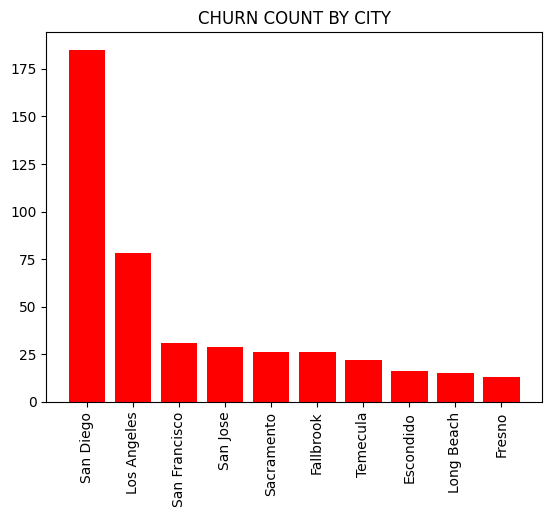

In [29]:
# Visualizing the churn rate by customer city
churn_by_city = df.groupby('City')['Customer Status'].apply(lambda x: (x == 'Churned').sum()).sort_values(ascending=False).head(10)

plt.bar(churn_by_city.index, churn_by_city,color="Red")
plt.title('CHURN COUNT BY CITY')
plt.xticks(rotation="vertical")
plt.show()

Insights: These cities have the highest churn rates

In [31]:
# Calculate overall churn rate
overall_churn_rate = (df['Customer Status'] == 'Churned').mean()
print(f"Overall Churn Rate: {overall_churn_rate * 100:.2f}%")


Overall Churn Rate: 26.54%


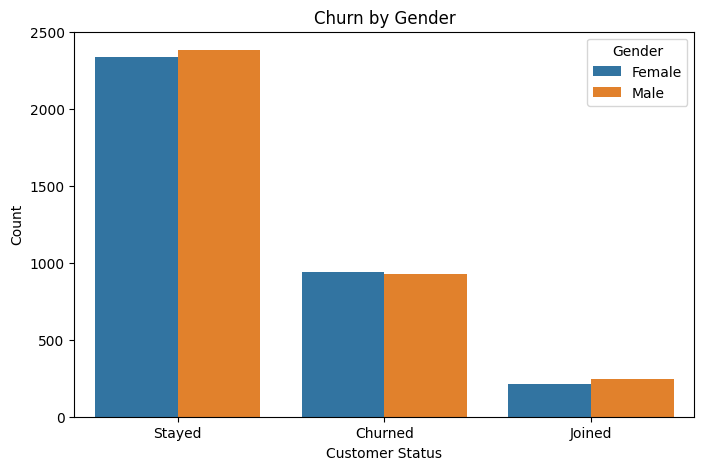

In [32]:
#churn by gender
plt.figure(figsize=(8, 5))
sns.countplot(x='Customer Status', hue='Gender', data=df)
plt.xlabel('Customer Status')
plt.ylabel('Count')
plt.title('Churn by Gender')
plt.legend(title='Gender')
plt.show()


Insights: Gender doesn't affect churn decision of customers

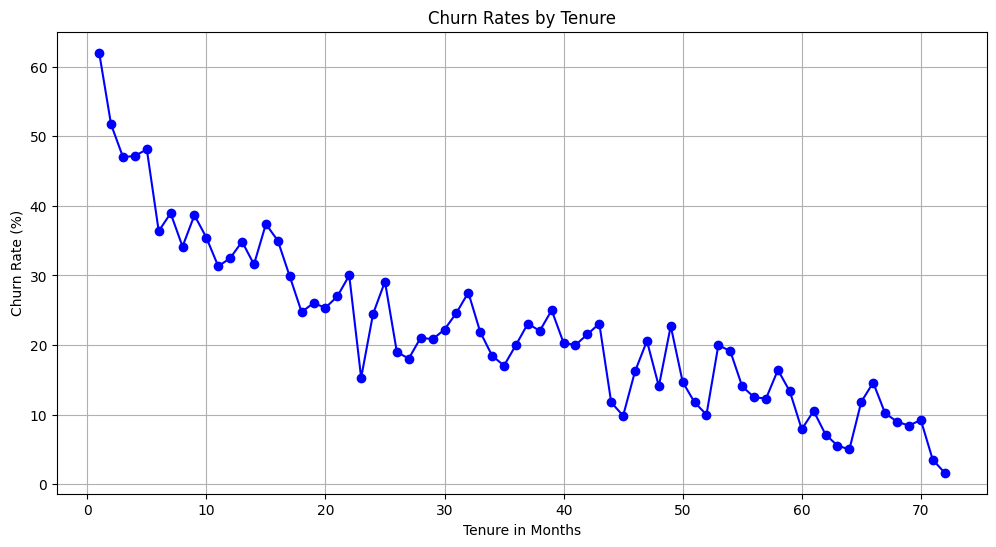

In [35]:
# Visualize churn rates by tenure in months
churn_by_tenure = df.groupby('Tenure in Months')['Customer Status'].apply(lambda x: (x == 'Churned').mean() * 100)
plt.figure(figsize=(12, 6))
plt.plot(churn_by_tenure.index, churn_by_tenure.values, marker='o', linestyle='-', color='b')
plt.xlabel('Tenure in Months')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rates by Tenure')
plt.grid(True)
plt.show()



Insights: The churn rate decreases with increase in usage in tenure in months.

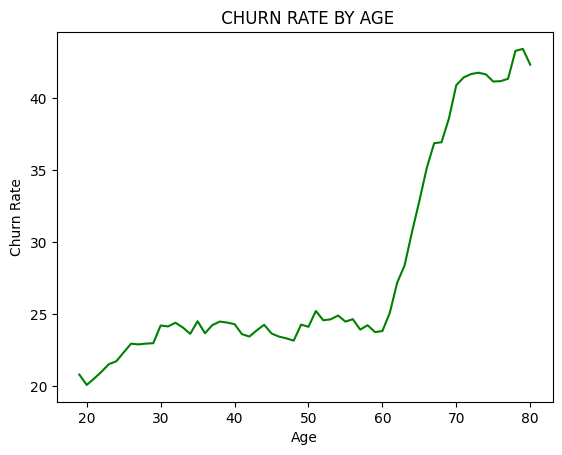

In [38]:
# Calculate churn rates by age group
churn_by_age = df.groupby('Age')['Customer Status'].apply(lambda x: (x == 'Churned').mean() * 100)

# Apply a moving average to smooth the churn rate line
window = 10  # Adjust the window size as needed
smoothed_churn_by_age = churn_by_age.rolling(window, min_periods=1, center=True).mean()

# Visualize the smoothed churn rates by age
plt.plot(smoothed_churn_by_age.index, smoothed_churn_by_age, color="Green")
plt.xlabel('Age')
plt.ylabel('Churn Rate')
plt.title(' CHURN RATE BY AGE')
plt.show()

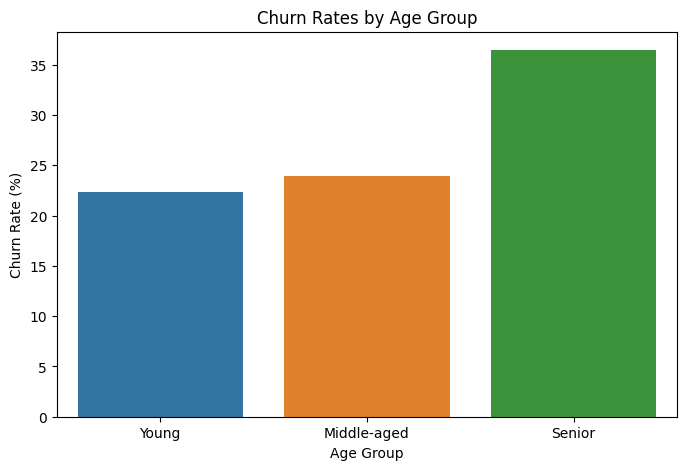

In [ ]:
# Define age groups
age_bins = [0, 30, 60, float('inf')]
age_labels = ['Young', 'Middle-aged', 'Senior']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Convert 'Customer Status' to numeric (0 for not churned, 1 for churned)
df['Churn Numeric'] = df['Customer Status'].apply(lambda x: 1 if x == 'Churned' else 0)

# Calculate churn rates by age group
churn_by_age_group = df.groupby('Age Group')['Churn Numeric'].mean() * 100

# Create a bar plot to visualize churn rates by age group
plt.figure(figsize=(8, 5))
sns.barplot(x=churn_by_age_group.index, y=churn_by_age_group.values)
plt.xlabel('Age Group')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rates by Age Group')
plt.show()


Insights: Senior citizens are more likely to churn than middle aged customers

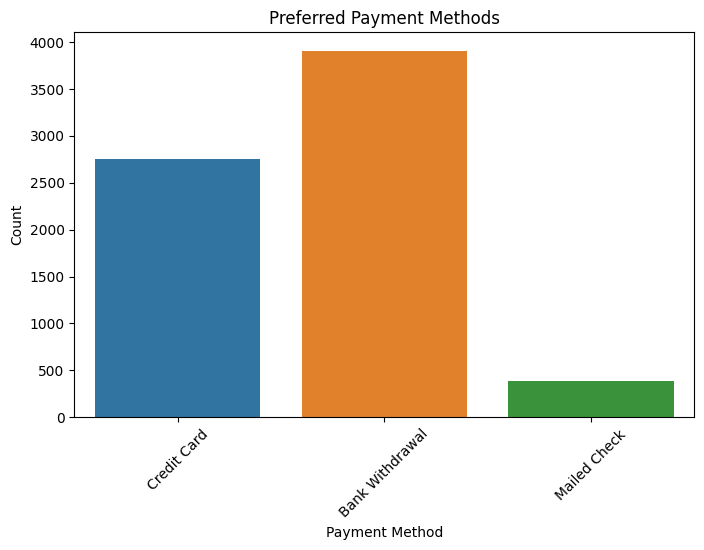

In [ ]:
# preferred payment methods
plt.figure(figsize=(8, 5))
sns.countplot(x='Payment Method', data=df)
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.title('Preferred Payment Methods')
plt.xticks(rotation=45)
plt.show()

Insights: Bank withdrawl is  the highest used payment method followed by credit card

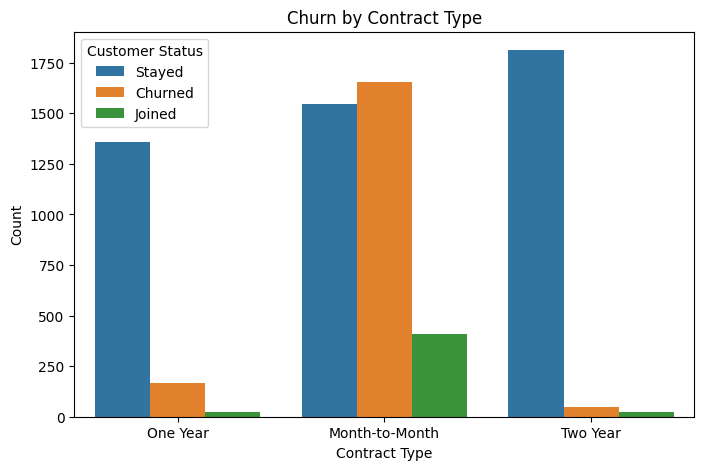

In [ ]:
# churn rates by contract type
plt.figure(figsize=(8, 5))
sns.countplot(x='Contract', hue='Customer Status', data=df)
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.title('Churn by Contract Type')
plt.legend(title='Customer Status')
plt.show()

Insights: Its very very likely for customers to churn if they have 'Month-to-Month contract type'

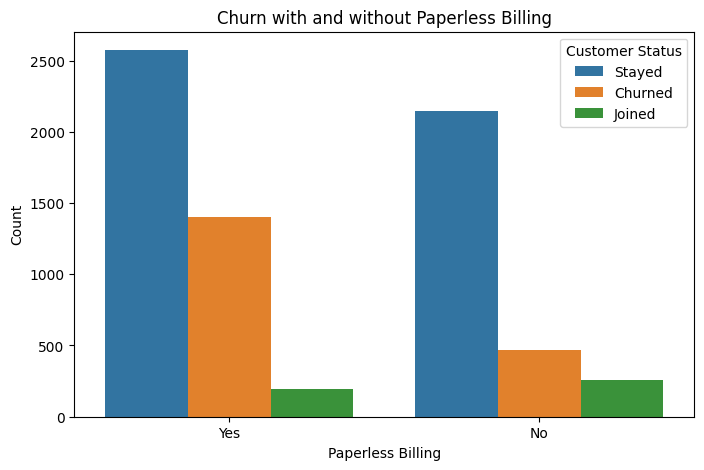

In [ ]:
#  churn rates with and without paperless billing
plt.figure(figsize=(8, 5))
sns.countplot(x='Paperless Billing', hue='Customer Status', data=df)
plt.xlabel('Paperless Billing')
plt.ylabel('Count')
plt.title('Churn with and without Paperless Billing')
plt.legend(title='Customer Status')
plt.show()

Insights: Customers who opted for paperless billing are more likely to churn

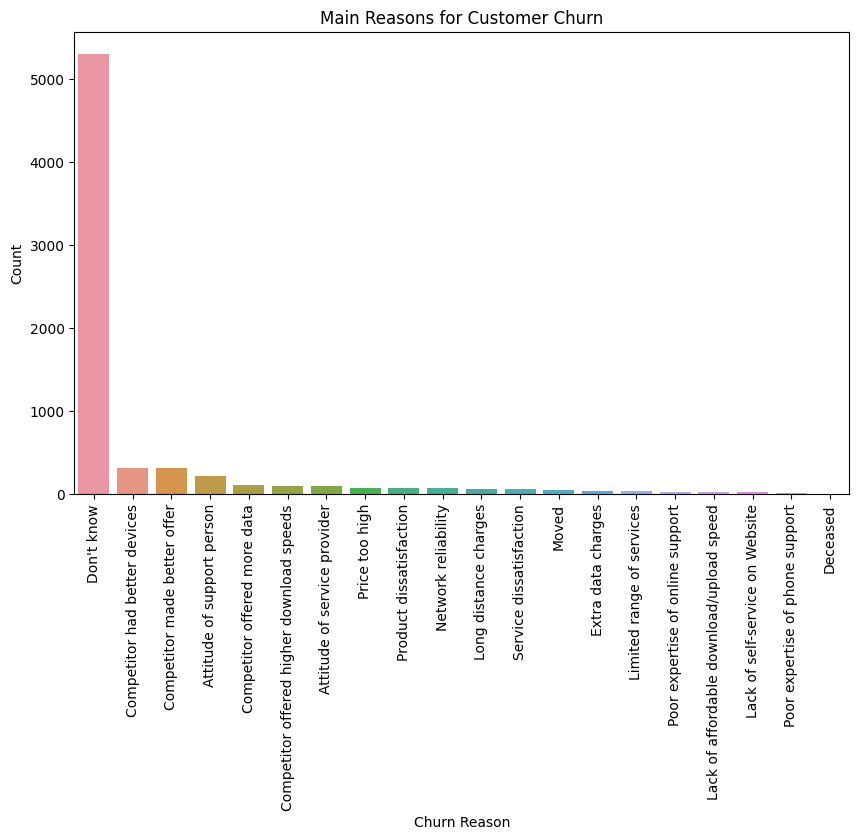

In [ ]:
#  main reasons for customer churn
plt.figure(figsize=(10, 6))
sns.countplot(x='Churn Reason', data=df, order=df['Churn Reason'].value_counts().index)
plt.xlabel('Churn Reason')
plt.ylabel('Count')
plt.title('Main Reasons for Customer Churn')
plt.xticks(rotation=90)
plt.show()

let's get rid of  'Dont know' to get conclusive insights 

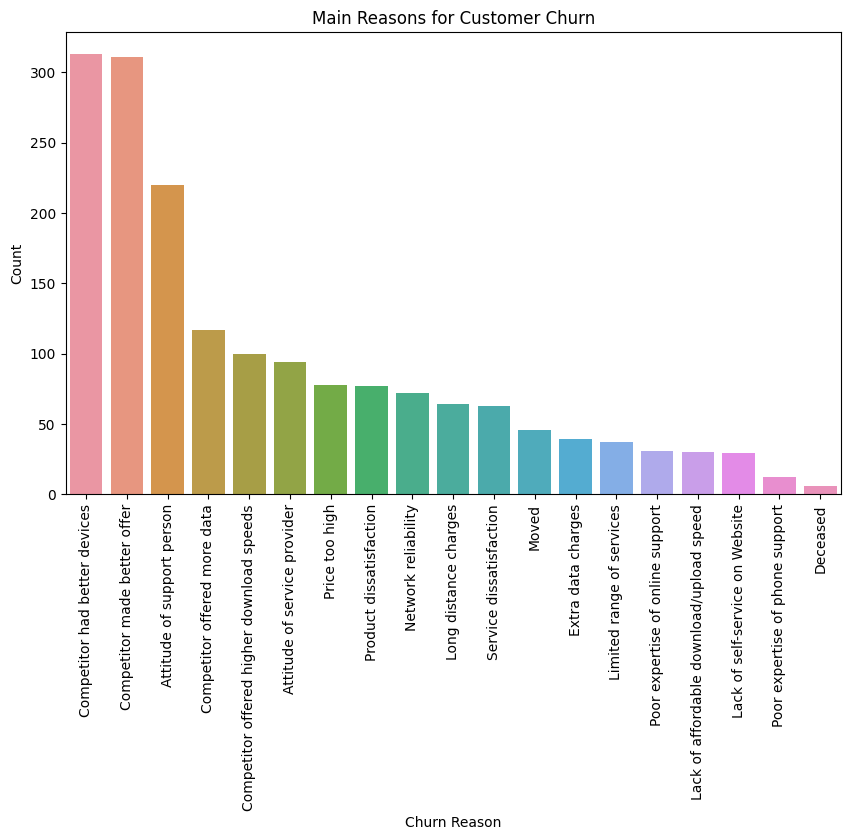

In [ ]:
# Filter the DataFrame to exclude the "Don't Know" reason
filtered_df = df[df['Churn Reason'] != "Don't know"]

# Visualize the main reasons for customer churn without "Don't Know"
plt.figure(figsize=(10, 6))
sns.countplot(x='Churn Reason', data=filtered_df, order=filtered_df['Churn Reason'].value_counts().index)
plt.xlabel('Churn Reason')
plt.ylabel('Count')
plt.title('Main Reasons for Customer Churn')
plt.xticks(rotation=90)
plt.show()

Insight: The company lost customers majorly due to better offers and devices from the competitors. Also the customer support of the company was not very well mannered and professional. 

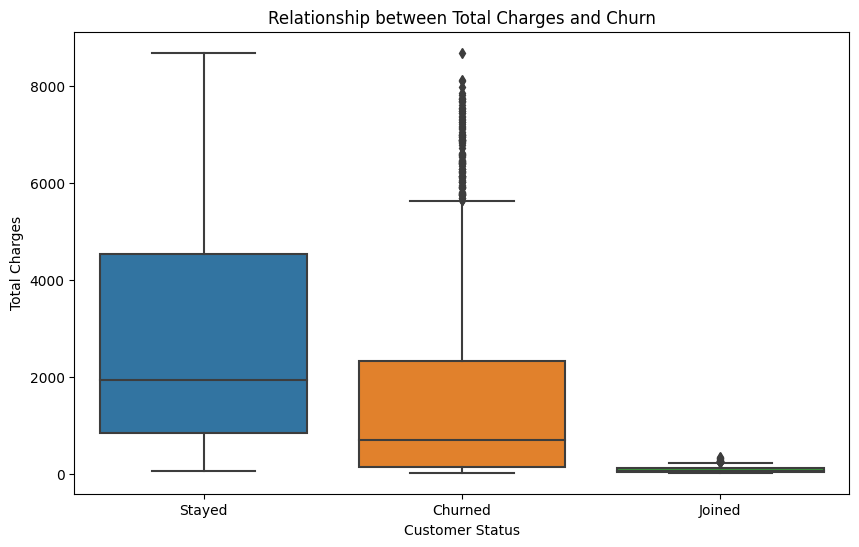

In [ ]:

# relationship between total charges and churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Customer Status', y='Total Charges', data=df)
plt.xlabel('Customer Status')
plt.ylabel('Total Charges')
plt.title('Relationship between Total Charges and Churn')
plt.show()


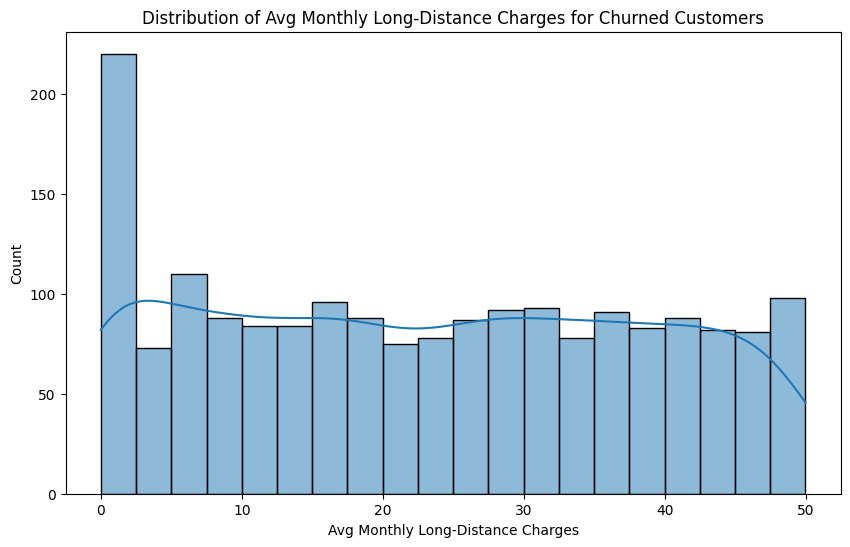

In [ ]:
# the average monthly long-distance charges for churned customers
avg_long_distance_charges_churned = df[df['Customer Status'] == 'Churned']['Avg Monthly Long Distance Charges']

plt.figure(figsize=(10, 6))
sns.histplot(avg_long_distance_charges_churned, bins=20, kde=True)
plt.xlabel('Avg Monthly Long-Distance Charges')
plt.ylabel('Count')
plt.title('Distribution of Avg Monthly Long-Distance Charges for Churned Customers')
plt.show()

Insight: The long distance charges doesn't seem to affect the churn rate.

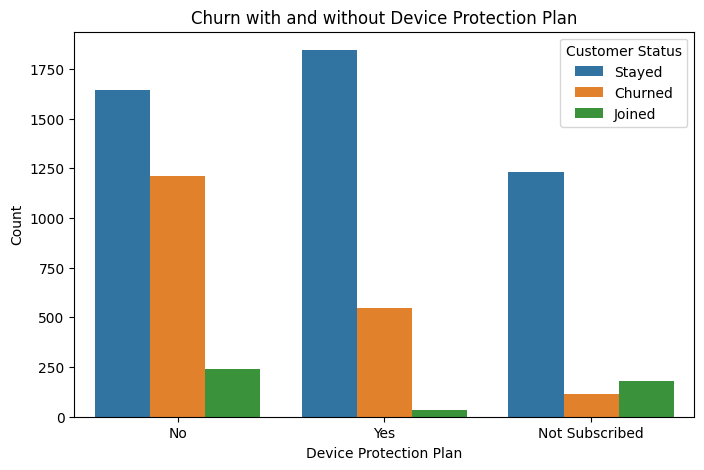

In [ ]:
#churn rates with and without a device protection plan
plt.figure(figsize=(8, 5))
sns.countplot(x='Device Protection Plan', hue='Customer Status', data=df)
plt.xlabel('Device Protection Plan')
plt.ylabel('Count')
plt.title('Churn with and without Device Protection Plan')
plt.legend(title='Customer Status')
plt.show()

Insight: Customers without any device plan are more likely to churn

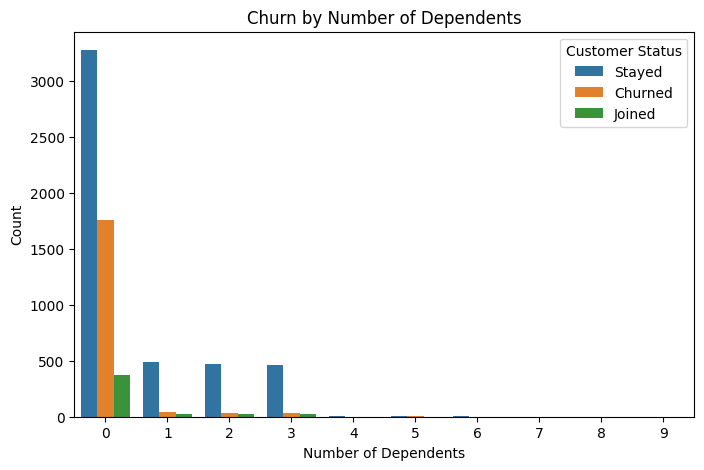

In [ ]:
#churn rates for customers with different numbers of dependents
plt.figure(figsize=(8, 5))
sns.countplot(x='Number of Dependents', hue='Customer Status', data=df)
plt.xlabel('Number of Dependents')
plt.ylabel('Count')
plt.title('Churn by Number of Dependents')
plt.legend(title='Customer Status')
plt.show()

Insight: It is not conclusive to paint any picture on churn rate based on number of dependents as our dataset seems to have majority of customers with no dependents than otherwise.

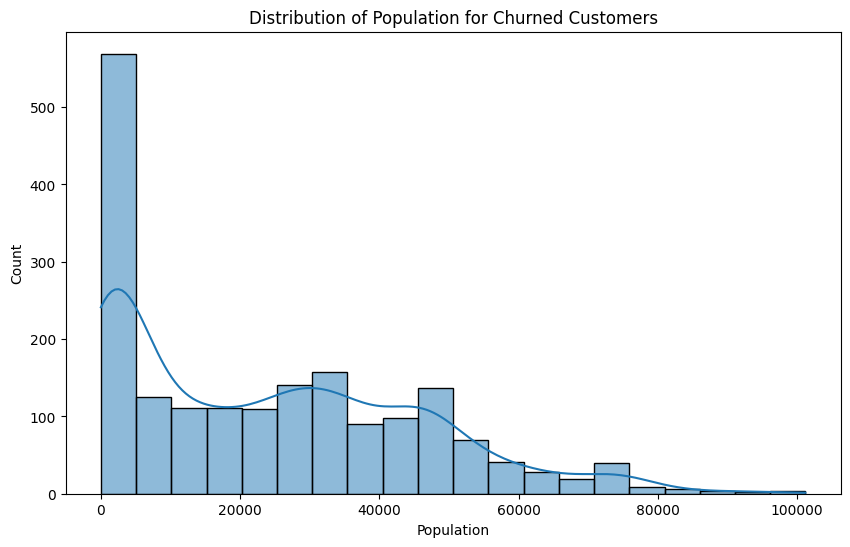

In [36]:
#distribution of population for churned customers
plt.figure(figsize=(10, 6))
sns.histplot(data=df[df['Customer Status'] == 'Churned'], x='Population', bins=20, kde=True)
plt.xlabel('Population')
plt.ylabel('Count')
plt.title('Distribution of Population for Churned Customers')
plt.show()

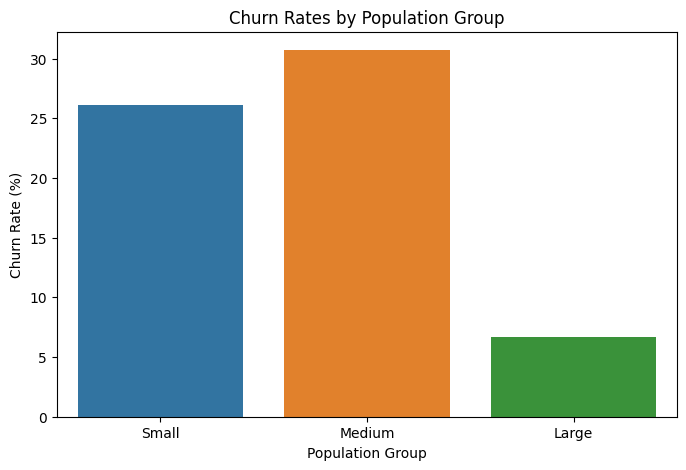

In [37]:
# Define population groups (e.g., small, medium, large)
population_bins = [0, 50000, 100000, float('inf')]
population_labels = ['Small', 'Medium', 'Large']
df['Population Group'] = pd.cut(df['Population'], bins=population_bins, labels=population_labels)

# Calculate churn rates by population group
churn_by_population_group = df.groupby('Population Group')['Customer Status'].apply(lambda x: (x == 'Churned').mean() * 100)

# Create a bar plot to visualize churn rates by population group
plt.figure(figsize=(8, 5))
sns.barplot(x=churn_by_population_group.index, y=churn_by_population_group.values)
plt.xlabel('Population Group')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rates by Population Group')
plt.show()


Insight: Cities with higher population have low churn rate